<a href="https://colab.research.google.com/github/amindazad/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [X] Continue to clean and explore your data. 
- [X] For the evaluation metric you chose, what score would you get just by guessing?
- [X] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [0]:
# Change column names: replace spaces with underscores


In [0]:
# Get Pandas Profiling Report


In [0]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)


In [0]:
# Q. What's the date range of these property sales in Tribeca?


In [0]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers


In [0]:
# Q. What is the maximum SALE_PRICE in this dataset?


In [0]:
# Look at the row with the max SALE_PRICE


In [0]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?


In [0]:
# Keep only the single units


In [0]:
# Q. Now what is the max sales price? How many square feet does it have?


In [0]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 



In [0]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?


In [0]:
# What are the building class categories?
# How frequently does each occur?


In [0]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)


In [0]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE


In [0]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"


In [0]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [0]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)


In [0]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [0]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.


In [0]:
# Import the dataset 
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/amindazad/ATP_ITF_TennisMatch_Winner/master/all_matches.csv', header=1)
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
0,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,adriano-ferreira_eduardo-frick,NaN,frank-clausing_maarten-kamermans,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,2,2,12,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN,t,t,25,4
1,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,adriano-ferreira_eduardo-frick,NaN,kalle-flygt_lars-zimmermann,NaN,netherlands-f1-futures_itf_procircuit0,Quarter-Finals,3,1,13,15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,t,t,25,5
2,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin,NaN,bobbie-altelaar,NaN,netherlands-f1-futures_itf_procircuit0,Round of 32,2,2,12,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN,t,f,25,3
3,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin,NaN,pavel-snobel,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,2,0,7,13,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,f,f,25,4
4,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin_luben-pampoulov,NaN,johan-dijkstra_marck-philippen,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,3,1,12,14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,f,t,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54145,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,walter-trusendi,W. Trusendi,markus-eriksson,M. Eriksson,cordenons_challenger,2nd Round Qualifying,2,0,5,12,0,0,206.0,1.0,3.0,22.0,49.0,14.0,22.0,10.0,27.0,3.0,6.0,8.0,66.0,6.0,32.0,15.0,32.0,0.0,3.0,9.0,24.0,49.0,21.0,64.0,45.0,113.0,01:29:00,f,f,NaN,f,f,100,1
54146,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,walter-trusendi,W. Trusendi,sem-verbeek,S. Verbeek,cordenons_challenger,1st Round Qualifying,2,2,12,3,0,0,279.0,0.0,2.0,17.0,41.0,14.0,17.0,17.0,24.0,2.0,3.0,8.0,252.0,10.0,24.0,16.0,21.0,5.0,8.0,7.0,31.0,41.0,26.0,45.0,57.0,86.0,01:07:00,t,f,NaN,t,f,100,0
54147,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,carlos-gomez-herrera,C. Gomez-Herrera,cordenons_challenger,Round of 32,2,2,12,7,0,0,287.0,1.0,0.0,47.0,59.0,32.0,47.0,6.0,12.0,5.0,6.0,9.0,164.0,23.0,53.0,9.0,18.0,4.0,13.0,10.0,38.0,59.0,32.0,71.0,70.0,130.0,01:26:00,t,f,6,t,f,100,3
54148,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,francesco-forti,F. Forti,cordenons_challenger,Round of 16,2,2,12,5,0,0,243.0,2.0,2.0,30.0,49.0,19.0,30.0,10.0,19.0,1.0,4.0,9.0,258.0,20.0,30.0,10.0,18.0,6.0,10.0,8.0,29.0,49.0,30.0,48.0,59.0,97.0,01:08:00,t,f,6,t,f,100,4


In [0]:
# Choose my target 
target = 'player_victory'
# I want to predict tennis match winner based on the match data, my target is catagorical (True/False)
# Hence -> Classification 

# Take a look at the target 
df['player_victory'].describe()

count     54150
unique        2
top           t
freq      27076
Name: player_victory, dtype: object

In [0]:
# Choosing a baseline and look at the distribution to start 

df['player_victory'].value_counts(normalize=True)
# They are both very close not tot imbalanced , I'm going to choose T(Win)=50% as baseline

t    0.500018
f    0.499982
Name: player_victory, dtype: float64

In [0]:
df['player_victory'].nunique()
# As mentioned earlier, only two classes so classification problem

2

In [0]:
df.dtypes

start_date                               object
end_date                                 object
location                                 object
court_surface                            object
prize_money                             float64
currency                                 object
year                                      int64
player_id                                object
player_name                              object
opponent_id                              object
opponent_name                            object
tournament                               object
round                                    object
num_sets                                  int64
sets_won                                  int64
games_won                                 int64
games_against                             int64
tiebreaks_won                             int64
tiebreaks_total                           int64
serve_rating                            float64
aces                                    

In [0]:
from pandas_profiling import ProfileReport

#Check out the NaN values distribution among all variables 
#profile = ProfileReport(df)

In [0]:
profile

default


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/basic.py:300: UserWarning: %profile is now deprecated. Please use get_ipython().profile instead.
  warn("%profile is now deprecated. Please use get_ipython().profile instead.")


In [0]:
# Check out NaN values 
df.isnull().sum().sort_values()
# Seems like most of the features we want to use have the same number of NaN values 

start_date                                  0
doubles                                     0
retirement                                  0
player_victory                              0
masters                                     0
tiebreaks_total                             0
tiebreaks_won                               0
games_against                               0
games_won                                   0
sets_won                                    0
num_sets                                    0
round                                       0
round_num                                   0
opponent_id                                 0
end_date                                    0
player_id                                   0
year                                        0
location                                    0
court_surface                               0
tournament                                  0
won_first_set                             714
seed                              

In [0]:
# Lets drop them
df_cleaned = df.dropna()
df_cleaned

,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
19719,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,adrian-mannarino,A. Mannarino,matthias-bachinger,M. Bachinger,loughborough_challenger,Round of 32,3,1,10,16,0,0,218.0,2.0,4.0,49.0,90.0,29.0,49.0,19.0,41.0,10.0,15.0,13.0,185.0,10.0,42.0,13.0,28.0,2.0,2.0,13.0,48.0,90.0,23.0,70.0,71.0,160.0,01:42:00,f,f,2,f,f,100,3
19720,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,luke-bambridge,L. Bambridge,loughborough_challenger,2nd Round Qualifying,2,2,12,4,0,0,282.0,3.0,2.0,30.0,46.0,22.0,30.0,9.0,16.0,1.0,2.0,8.0,228.0,11.0,30.0,19.0,24.0,5.0,10.0,8.0,31.0,46.0,30.0,54.0,61.0,100.0,00:56:00,t,f,4,t,f,100,1
19721,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,sean-thornley,S. Thornley,loughborough_challenger,3rd Round Qualifying,2,0,11,14,0,1,252.0,3.0,2.0,45.0,76.0,31.0,45.0,15.0,31.0,1.0,4.0,12.0,124.0,13.0,41.0,18.0,42.0,2.0,6.0,12.0,46.0,76.0,31.0,83.0,77.0,159.0,01:36:00,f,f,4,f,f,100,2
19726,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,james-ward,J. Ward,loughborough_challenger,Quarter-Finals,2,0,5,12,0,0,236.0,7.0,2.0,23.0,47.0,20.0,23.0,8.0,24.0,4.0,7.0,8.0,51.0,7.0,29.0,6.0,22.0,0.0,3.0,9.0,28.0,47.0,13.0,51.0,41.0,98.0,01:07:00,f,f,3,f,f,100,5
19727,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,sean-thornley,S. Thornley,loughborough_challenger,Round of 32,2,2,12,3,0,0,300.0,4.0,3.0,24.0,46.0,20.0,24.0,14.0,22.0,1.0,1.0,8.0,224.0,9.0,18.0,12.0,20.0,4.0,7.0,7.0,34.0,46.0,21.0,38.0,55.0,84.0,00:59:00,t,f,3,t,f,100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54143,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,lorenzo-giustino,L. Giustino,cordenons_challenger,Round of 32,2,2,13,7,1,1,237.0,3.0,7.0,30.0,66.0,22.0,30.0,19.0,36.0,3.0,6.0,10.0,236.0,13.0,32.0,18.0,26.0,5.0,7.0,9.0,41.0,66.0,31.0,58.0,72.0,124.0,01:31:00,t,f,5,t,f,100,3
54144,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,paolo-lorenzi,P. Lorenzi,cordenons_challenger,Quarter-Finals,2,0,6,12,0,0,234.0,1.0,1.0,38.0,51.0,22.0,38.0,6.0,13.0,2.0,6.0,9.0,104.0,9.0,29.0,11.0,26.0,1.0,5.0,9.0,28.0,51.0,20.0,55.0,48.0,106.0,01:18:00,f,f,5,f,f,100,5
54147,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,carlos-gomez-herrera,C. Gomez-Herrera,cordenons_challenger,Round of 32,2,2,12,7,0,0,287.0,1.0,0.0,47.0,59.0,32.0,47.0,6.0,12.0,5.0,6.0,9.0,164.0,23.0,53.0,9.0,18.0,4.0,13.0,10.0,38.0,59.0,32.0,71.0,70.0,130.0,01:26:00,t,f,6,t,f,100,3
54148,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,francesco-forti,F. Forti,cordenons_challenger,Round of 16,2,2,12,5,0,0,243.0,2.0,2.0,30.0,49.0,19.0,30.0,10.0,19.0,1.0,4.0,9.0,25

In [0]:
# Choosing the features

# I'm going to cosider all features in our dataset are important and later on
# We're going to remove the ones with high cardinality, leakage through our data 
# Cleaning and Wrangling process

# Lets first divide the data randomly using train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cleaned, train_size=0.85, test_size=0.15, 
                              stratify=df_cleaned['player_victory'], random_state=42)

train, val = train_test_split(train, train_size=0.85, test_size=0.15, stratify=train['player_victory'],
                               random_state=42)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [0]:
train

,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
38112,2015-06-15,2015-06-20,United Kingdom of Great Britain and Northern I...,Grass,42500.0,€,2015,yuichi-sugita,Y. Sugita,ze-zhang,Z. Zhang,ilkley_challenger,1st Round Qualifying,3,1,18,20,1,2,248.0,6.0,2.0,82.0,130.0,53.0,82.0,24.0,48.0,8.0,14.0,18.0,156.0,15.0,58.0,28.0,53.0,5.0,10.0,18.0,77.0,130.0,43.0,111.0,120.0,241.0,02:30:00,f,f,2,t,f,100,0
34128,2013-10-14,2013-10-20,Austria,Hard,501355.0,€,2013,martin-fischer,M. Fischer,radek-stepanek,R. Stepanek,vienna,Round of 32,2,0,8,13,0,0,179.0,1.0,4.0,47.0,79.0,25.0,47.0,11.0,32.0,6.0,13.0,11.0,185.0,11.0,35.0,18.0,28.0,4.0,8.0,10.0,36.0,79.0,29.0,63.0,65.0,142.0,01:40:00,f,f,WC,f,f,250,3
50659,2018-01-15,2018-01-28,Australia,Hard,25096000.0,A$,2018,marin-cilic,M. Cilic,rafael-nadal,R. Nadal,australian-open,Quarter-Finals,5,3,23,18,0,1,284.0,20.0,8.0,93.0,138.0,72.0,93.0,17.0,45.0,8.0,10.0,20.0,152.0,40.0,123.0,28.0,41.0,5.0,19.0,20.0,89.0,138.0,68.0,164.0,157.0,302.0,03:47:00,t,t,6,f,f,2000,5
46205,2016-07-18,2016-07-23,Austria,Clay,463520.0,€,2016,paolo-lorenzi,P. Lorenzi,roberto-carballes-baena,R. Carballes Baena,kitzbuhel,Round of 16,2,2,12,4,0,0,287.0,3.0,1.0,26.0,52.0,20.0,26.0,15.0,26.0,1.0,1.0,8.0,192.0,9.0,26.0,15.0,24.0,4.0,9.0,8.0,35.0,52.0,24.0,50.0,59.0,102.0,01:18:00,t,f,4,t,f,250,4
36601,2014-09-29,2014-10-05,China,Hard,2500470.0,$,2014,teymuraz-gabashvili,T. Gabashvili,chuhan-wang,C. Wang,beijing,1st Round Qualifying,2,2,12,3,0,0,275.0,2.0,2.0,30.0,47.0,25.0,30.0,7.0,17.0,2.0,3.0,8.0,232.0,5.0,20.0,24.0,30.0,5.0,9.0,7.0,32.0,47.0,29.0,50.0,61.0,97.0,00:57:00,t,f,1,t,f,500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50985,2018-02-26,2018-03-04,USA,Hard,150000.0,$,2018,taylor-fritz,T. Fritz,dudi-sela,D. Sela,indian-wells-ca-usa_challenger,Quarter-Finals,2,2,12,5,0,0,321.0,6.0,1.0,32.0,45.0,29.0,32.0,7.0,13.0,0.0,0.0,9.0,182.0,6.0,23.0,13.0,22.0,3.0,5.0,8.0,36.0,45.0,19.0,45.0,55.0,90.0,00:50:00,t,f,4,t,f,100,5
46557,2017-02-13,2017-02-19,USA,Hard,642750.0,$,2017,brian-baker,B. Baker,matthew-ebden,M. Ebden,memphis,2nd Round Qualifying,2,0,6,12,0,0,209.0,3.0,2.0,51.0,79.0,27.0,51.0,13.0,28.0,13.0,18.0,9.0,149.0,9.0,33.0,11.0,22.0,2.0,4.0,9.0,40.0,79.0,20.0,55.0,60.0,134.0,01:24:00,f,f,AL,f,f,250,2
44774,2016-04-18,2016-04-24,Spain,Clay,2152690.0,€,2016,radek-stepanek,R. Stepanek,santiago-giraldo,S. Giraldo,barcelona,Round of 64,2,2,13,9,0,0,289.0,0.0,2.0,35.0,60.0,25.0,35.0,18.0,25.0,0.0,1.0,11.0,136.0,24.0,57.0,17.0,37.0,3.0,14.0,11.0,43.0,60.0,41.0,94.0,84.0,154.0,01:54:00,t,f,Q,t,f,500,2
36833,2014-10-05,2014-10-12,China,Hard,4195895.0,$,2014,john-isner,J. Isner,pablo-andujar,P. Andujar,shanghai,Round of 64,3,2,14,15,1,1,317.0,22.0,0.0,59.0,88.0,42.0,59.0,21.0,29.0,6.0,8.0,14.0,123.0,15.0,59.0,13.0,32.0,1.0,2.0,14.0,63.0,88.0,28.0,91.0,91.0,179.0,02:01:00,t,f,13,t,f,1000,2


In [0]:
# Define a funcltion to wrangle all our datasets and do make feature engeering easier
def wrangle(X) :
  #Prevent SettingWithCopyWarning
  X=X.copy()
  #convert Start_date and End_date , duration and Year to datetime format 
  X['start_date'] = pd.to_datetime(X['start_date'], infer_datetime_format=True)
  X['end_date'] = pd.to_datetime(X['end_date'], infer_datetime_format=True)
  #X['year'] = pd.to_datetime(X['year'], infer_datetime_format=True)
  #X['duration'] = pd.to_datetime(X['duration'], infer_datetime_format=True)
  #X['duration'] = pd.DatetimeIndex(X['duration'])
  return X 

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [0]:
#drop target from train
train_features = train.drop(columns=[target])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [0]:
!pip install category_encoders

In [0]:
# Lets try a shallow decision tree as a fast first model
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=3))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9920106524633822

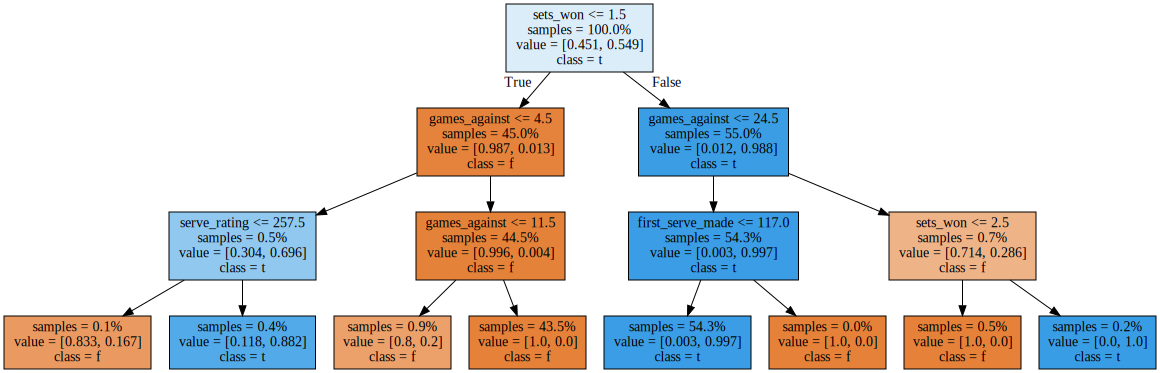

In [0]:
# Probably has a leakage, too good to be true 
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [0]:
#Sets won actually indicates the final income and is a leakage, lets drop it. 

train_features = train.drop(columns=[target,'sets_won'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=3))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9387483355525965

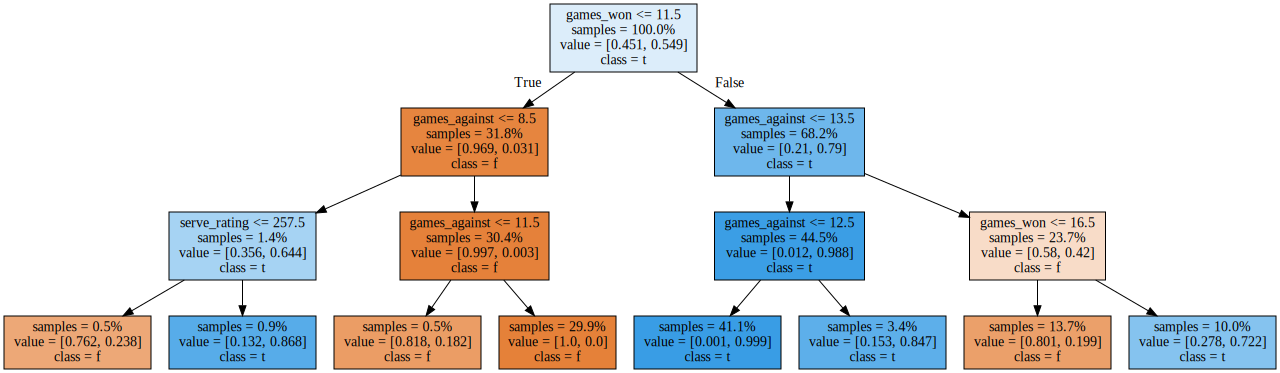

In [0]:
# Still 93% is pretty high lets look for leakage again
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [0]:
#Games won, games against actually indicate the final income and is a leakage, lets drop it. 
train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=3))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.8961384820239681

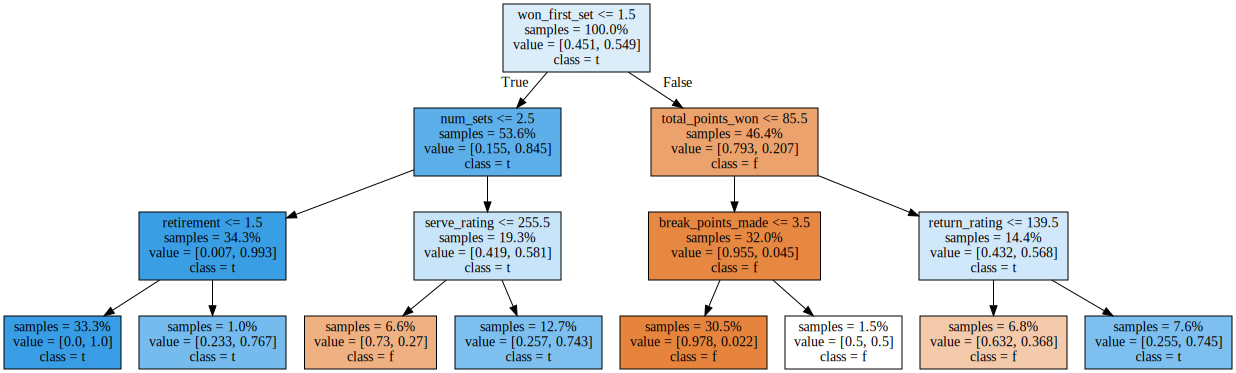

In [0]:
# 89% is still pretty high, lets see why 
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [0]:
# Total points won should be there !!! It's an strong indicator, lets drop that too
train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against', 'total_points_won'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=4))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9174434087882823

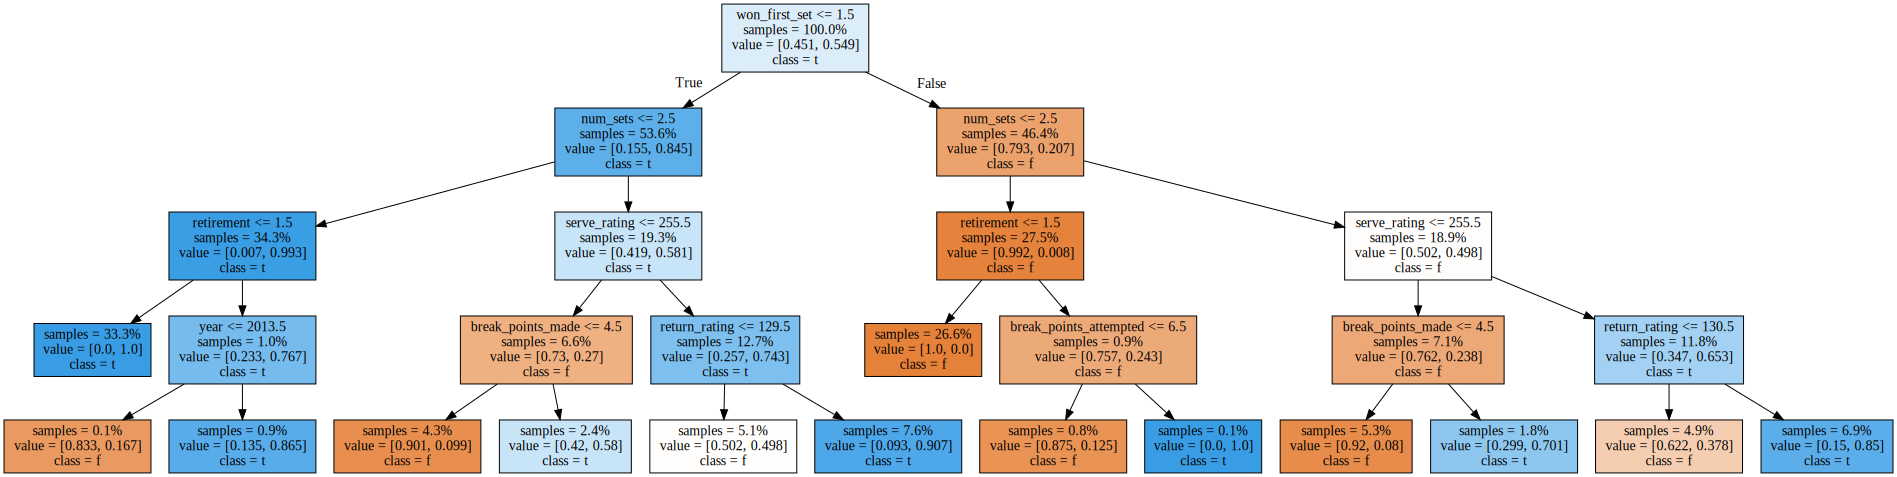

In [0]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [0]:
# Let's remove year, our goal is to predict the winner based on match statistics 
# not the year it took place 

train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against',
                                     'total_points_won', 'year'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=4))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9174434087882823

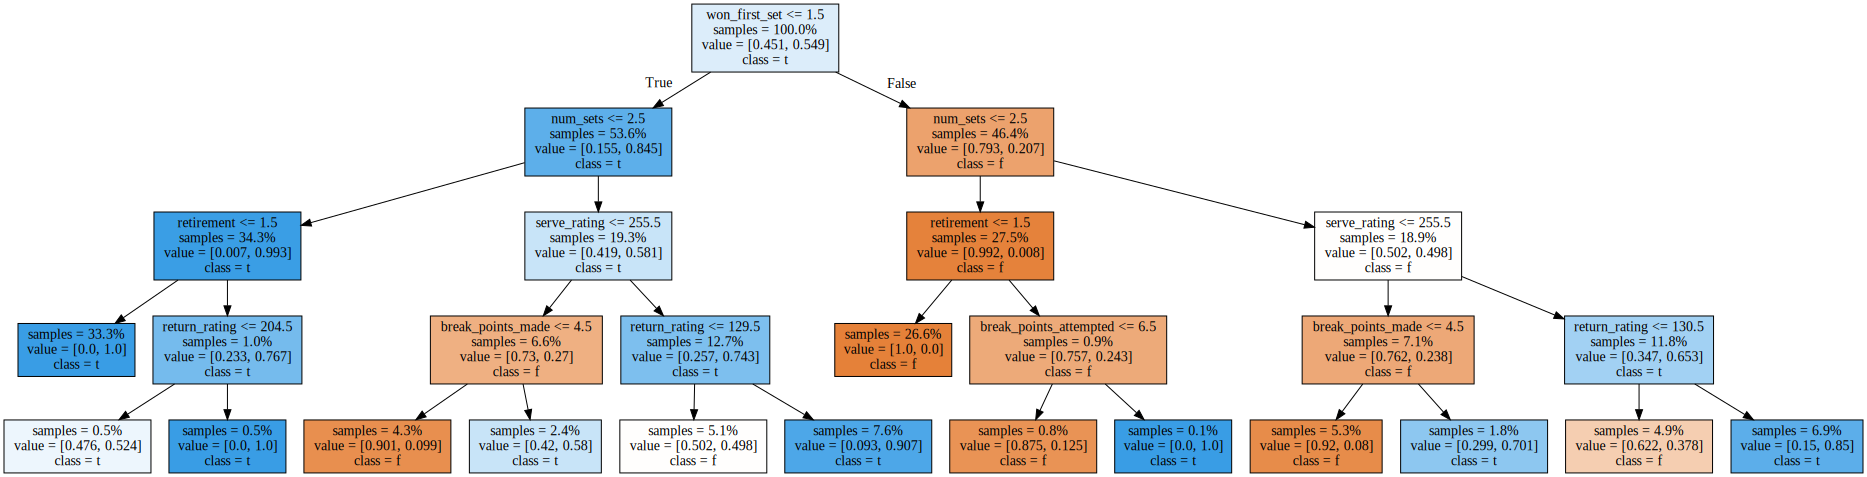

In [0]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [0]:
# We're pretty good now, I'm gonna come back and remove all the columns 
# that are not related to match stats and try again, use some domain experties!

# For now lets move on and calculate our ROC AUC, our initial baseline and decisiontree
# are good eval metrics but just in case 

from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

0.9729322393103647

In [0]:
profile = ProfileReport(train)

In [0]:
profile